In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

In [2]:
datadir = "track"
columns = ["center", "left", "right", "steering", "throttle", "reverse", "speed"]
data = pd.read_csv(os.path.join(datadir, "E:\\Ekanth\\ML\\RTRP\\track\\driving_log.csv"), names = columns)
pd.set_option("display.max_colwidth", -1)
data.head()

C:\Users\ekant\AppData\Local\Temp\ipykernel_7944\1936615339.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


center  \
0  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg   

                                                                   left  \
0  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg   

                                                                   right  \
0  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0.0      0.649786  
1  0.0       0.0       0.0      0.627942  
2  0.0       0.0       0.0      0.622910  
3  0.0       0.0       0.0      0.619162  
4  0.0       0.0       0.0      0.615438

In [3]:
def path_red(path):
  head, tail = ntpath.split(path)
  return tail
data["center"] = data["center"].apply(path_red)
data["right"] = data["right"].apply(path_red)
data["left"] = data["left"].apply(path_red)
data.head()

center                              left  \
0  center_2018_07_16_17_11_43_382.jpg  left_2018_07_16_17_11_43_382.jpg   
1  center_2018_07_16_17_11_43_670.jpg  left_2018_07_16_17_11_43_670.jpg   
2  center_2018_07_16_17_11_43_724.jpg  left_2018_07_16_17_11_43_724.jpg   
3  center_2018_07_16_17_11_43_792.jpg  left_2018_07_16_17_11_43_792.jpg   
4  center_2018_07_16_17_11_43_860.jpg  left_2018_07_16_17_11_43_860.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2018_07_16_17_11_43_382.jpg  0.0       0.0       0.0      0.649786  
1  right_2018_07_16_17_11_43_670.jpg  0.0       0.0       0.0      0.627942  
2  right_2018_07_16_17_11_43_724.jpg  0.0       0.0       0.0      0.622910  
3  right_2018_07_16_17_11_43_792.jpg  0.0       0.0       0.0      0.619162  
4  right_2018_07_16_17_11_43_860.jpg  0.0       0.0       0.0      0.615438

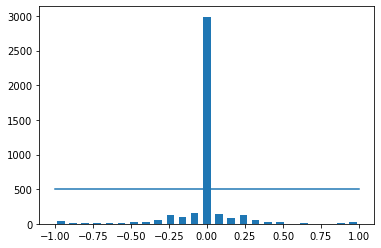

In [4]:
num_bins = 25
samples_bin = 500
hist, bins = np.histogram(data["steering"], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width = 0.05)
plt.plot((np.min(data["steering"]), np.max(data["steering"])), (samples_bin, samples_bin))

In [5]:
print(len(data))
print(data.shape)

4053
(4053, 7)


In [6]:
rem_li = []

for j in range(num_bins):
  li = []
  for i in range(len(data["steering"])):
    if data["steering"][i] >= bins[j] and data["steering"][i] <= bins[j + 1]:
      li.append(i)
  li = shuffle(li)
  li = li[samples_bin : ]
  rem_li.extend(li)

print("Removed: ", len(rem_li))
data.drop(data.index[rem_li], inplace = True)
print("Remaining: ", len(data))

Removed:  2490
Remaining:  1563


In [7]:
hist, _ = np.histogram(data["steering"], (num_bins))
plt.bar(center, hist, width = 0.05)
plt.plot((np.min(data["steering"]), np.max(data["steering"])), (samples_bin, samples_bin))

In [30]:
def load_img(datadir, df):
    img_path = []
    steering = []

    for i in range(len(data)):
        index_data = data.iloc[i]
        center, left, right = index_data[0], index_data[1], index_data[2]
        img_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(index_data[3]))

        img_path.append(os.path.join(datadir, left.strip()))
        steering.append(float(index_data[3]) + 0.15)

        img_path.append(os.path.join(datadir, right.strip()))
        steering.append(float(index_data[3]) - 0.15)

    img_paths = np.asarray(img_path)
    steerings = np.asarray(steering)
    return img_paths, steerings

In [9]:
img_paths, steerings = load_img(datadir + "\IMG", data)

In [10]:
print(img_paths)
print(len(img_paths))

['track\\IMG\\center_2018_07_16_17_11_43_670.jpg'
 'track\\IMG\\left_2018_07_16_17_11_43_670.jpg'
 'track\\IMG\\right_2018_07_16_17_11_43_670.jpg' ...
 'track\\IMG\\center_2018_07_16_17_16_32_161.jpg'
 'track\\IMG\\left_2018_07_16_17_16_32_161.jpg'
 'track\\IMG\\right_2018_07_16_17_16_32_161.jpg']
4689


In [11]:
print(steerings)
print(len(steerings))

[ 0.    0.15 -0.15 ...  0.    0.15 -0.15]
4689


In [12]:
x_train, x_test, y_train, y_test = train_test_split(img_paths, steerings, test_size = 0.2, random_state = 6)
print("Training Samples: {}\nValid Samples: {}".format(len(x_train), len(x_test)))

Training Samples: 3751
Valid Samples: 938


In [13]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))
axes[0].hist(y_train, bins = num_bins, width = 0.05, color = "blue")
axes[0].set_title("Training Set")
axes[1].hist(y_test, bins = num_bins, width = 0.05, color = "red")
axes[1].set_title("Testing set")

Text(0.5, 1.0, 'Testing set')

Text(0.5, 1.0, 'Zoomed Image')

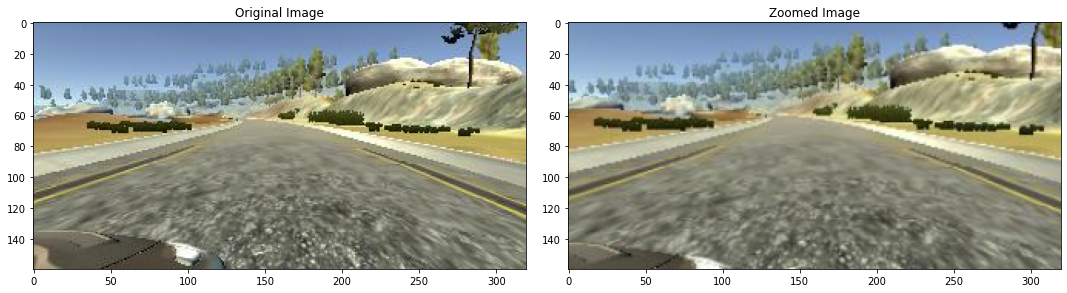

In [14]:
def zoom(image):
    zoom = iaa.Affine(scale = (1, 1.3))
    image=  zoom.augment_image(image)
    return image

img = img_paths[random.randint(0, 1000)]
og_img = mpimg.imread(img)
zoom_img = zoom(og_img)

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()

axs[0].imshow(og_img)
axs[0].set_title("Original Image")

axs[1].imshow(zoom_img)
axs[1].set_title("Zoomed Image")

Text(0.5, 1.0, 'Panned Image')

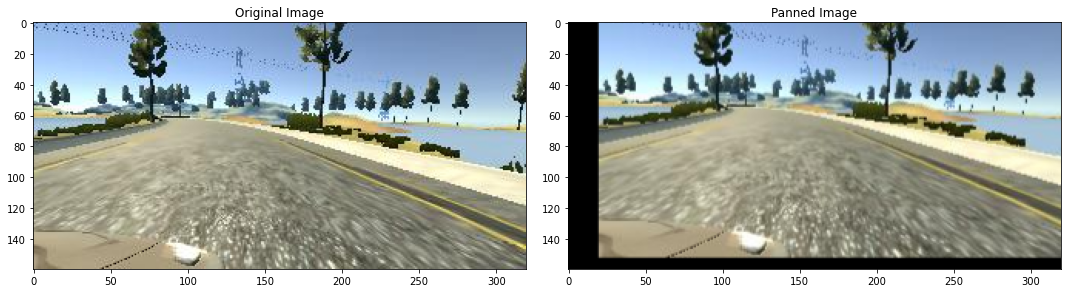

In [15]:
def pan(image):
    pan = iaa.Affine(translate_percent = {"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image

image = img_paths[random.randint(0, 1000)]
org_img = mpimg.imread(image)
panned_image = pan(org_img)

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()

axs[0].imshow(org_img)
axs[0].set_title("Original Image")

axs[1].imshow(panned_image)
axs[1].set_title("Panned Image")

Text(0.5, 1.0, 'Brightness Altered Image')

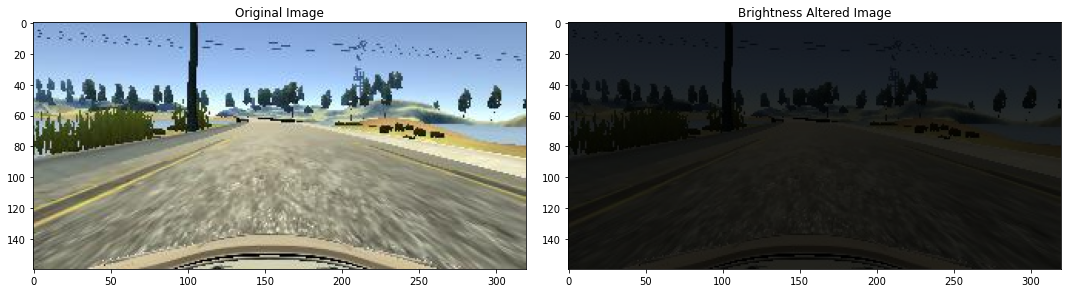

In [16]:
def img_brightness(image):
    brightness = iaa.Multiply((0.02, 1.2))
    image = brightness.augment_image(image)
    return image

image = img_paths[random.randint(1, 1000)]
orgi_img = mpimg.imread(image)
brightness_altered_img = img_brightness(orgi_img)

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()

axs[0].imshow(orgi_img)
axs[0].set_title("Original Image")

axs[1].imshow(brightness_altered_img)
axs[1].set_title("Brightness Altered Image")

In [17]:
def img_flip(image, steering_angle):
    image = cv2.flip(image, 1)
    steering_angle = -steering_angle
    return image, steering_angle

random_index = random.randint(0, 1000)
image = img_paths[random_index]
steering_angle = steerings[random_index]

origin_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_flip(origin_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()

axs[0].imshow(origin_image)
axs[0].set_title("Original Image - " + "Steering Angle: " + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title("Flipped Image - " + "Steering Angle " + str(flipped_steering_angle))


Text(0.5, 1.0, 'Flipped Image - Steering Angle -0.4613252')

In [18]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = img_brightness(image)
    if np.random.rand() < 0.5:
        image, steering_angle = img_flip(image, steering_angle)
    
    return image, steering_angle

In [19]:
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize = (15, 50))
fig.tight_layout()

for i in range(10):
    randnum = random.randint(0, len(img_paths) - 1)
    random_image = img_paths[randnum]
    random_steering = steerings[randnum]

    original_image = mpimg.imread(random_image)
    augmented_image, steering = random_augment(random_image, random_steering)

    axs[i][0].imshow(original_image)
    axs[i][0].set_title("Original Image")

    axs[i][1].imshow(augmented_image)
    axs[i][1].set_title("Augmented Image")

In [20]:
def image_pre(img):
    img = img[60 : 135, : , :]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img / 255
    return img


Text(0.5, 1.0, 'Preprocessed Image')

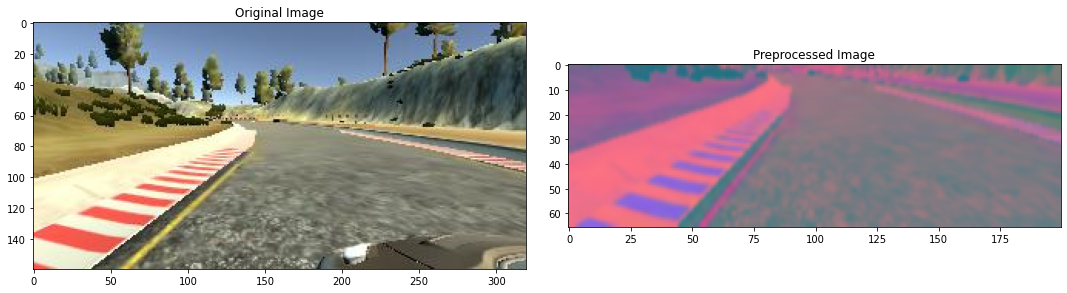

In [21]:
image = img_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = image_pre(original_image)

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("Original Image")
axs[1].imshow(preprocessed_image)
axs[1].set_title("Preprocessed Image")

In [22]:
#!nvidia-smi

In [23]:
def batch_gen(img_paths, steering_ang, batch_size, istraining):
    while True:
        batch_img = []
        batch_steering = []

        for i in range(batch_size):
            random_index = random.randint(0, len(img_paths) - 1)

            if istraining:
                im, steering = random_augment(img_paths[random_index], steering_ang[random_index])
            
            else:
                im = mpimg.imread(img_paths[random_index])
                steering = steering_ang[random_index]
            
            im = image_pre(im)
            batch_img.append(im)
            batch_steering.append(steering)
        
        yield(np.asarray(batch_img), np.asarray(batch_steering))

In [24]:
x_train_gen, y_train_gen = next(batch_gen(x_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_gen(x_test, y_test, 1, 0))

Text(0.5, 1.0, 'Testing Image')

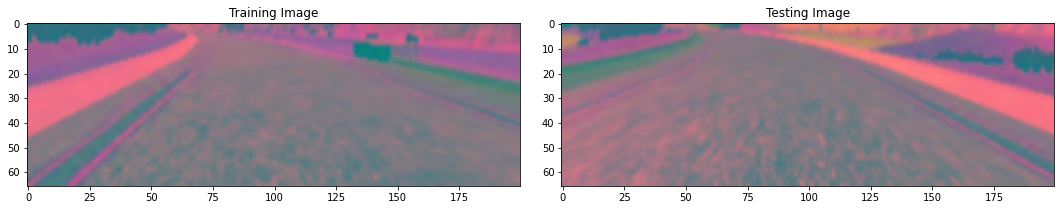

In [33]:
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title("Training Image")

axs[1].imshow(x_valid_gen[0])
axs[1].set_title("Testing Image")

In [26]:
def nvidia_model():
    model = Sequential()
    model.add(Conv2D(24, (5, 5), strides = (2, 2), input_shape = (66, 200, 3), activation = "elu"))
    model.add(Conv2D(36, (5, 5), strides = (2, 2), activation = "elu"))
    model.add(Conv2D(48, (5, 5), strides = (2, 2), activation = "elu"))
    model.add(Conv2D(64, (5, 5), activation = "elu"))

    model.add(Flatten())

    model.add(Dense(100, activation = "elu"))

    model.add(Dense(50, activation = "elu"))

    model.add(Dense(10, activation = "elu"))

    model.add(Dense(1))

    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
    model.compile(loss = "mse", optimizer = optimizer)
    return model

model = nvidia_model()
print(model.summary())




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 18, 64)         76864     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               115300    
                                                                 
 dense_1 (Dense)             (None, 50)                

In [29]:
history = model.fit_generator(batch_gen(x_train, y_train, 100, 1),
                              steps_per_epoch = 300,
                              epochs = 10, 
                              validation_data = batch_gen(x_test, y_test, 100, 0),
                              validation_steps = 200,
                              verbose = 1,
                              shuffle = 1)

C:\Users\ekant\AppData\Local\Temp\ipykernel_7944\4027498076.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(batch_gen(x_train, y_train, 100, 1),


Epoch 1/10
300/300 [==============================] - 158s 527ms/step - loss: 0.0913 - val_loss: 0.0629
Epoch 2/10
300/300 [==============================] - 139s 466ms/step - loss: 0.0720 - val_loss: 0.0575
Epoch 3/10
300/300 [==============================] - 141s 472ms/step - loss: 0.0633 - val_loss: 0.0481
Epoch 4/10
300/300 [==============================] - 128s 426ms/step - loss: 0.0562 - val_loss: 0.0422
Epoch 5/10
300/300 [==============================] - 133s 444ms/step - loss: 0.0500 - val_loss: 0.0407
Epoch 6/10
300/300 [==============================] - 135s 451ms/step - loss: 0.0476 - val_loss: 0.0369
Epoch 7/10
300/300 [==============================] - 130s 433ms/step - loss: 0.0448 - val_loss: 0.0372
Epoch 8/10
300/300 [==============================] - 123s 411ms/step - loss: 0.0445 - val_loss: 0.0322
Epoch 9/10
300/300 [==============================] - 122s 407ms/step - loss: 0.0422 - val_loss: 0.0323
Epoch 10/10
300/300 [==============================] - 121s 405m

Text(0.5, 0, 'Epoch')

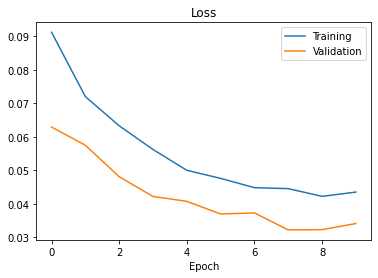

In [31]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Training", "Validation"])
plt.title("Loss")
plt.xlabel("Epoch")

In [32]:
model.save("model2.h5")


c:\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
